The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Attribute Information:

Bank client data:

- Age (numeric)
- Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

Related with the last contact of the current campaign:

- Contact: contact communication type (categorical: 'cellular','telephone')
- Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

- Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- Previous: number of contacts performed before this campaign and for this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes

- Emp.var.rate: employment variation rate - quarterly indicator (numeric)
- Cons.price.idx: consumer price index - monthly indicator (numeric)
- Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- Euribor3m: euribor 3 month rate - daily indicator (numeric)
- Nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

- y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [95]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df =pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [97]:
df.shape

(41188, 21)

In [98]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [100]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

12 unique job profiles

In [101]:
df['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

4 marital statuses

In [102]:
df['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

8 Educational profiles

In [103]:
print(df['default'].value_counts())

print(df['housing'].value_counts())

print(df['loan'].value_counts())

print(df['contact'].value_counts())

print(df['poutcome'].value_counts())

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64
contact
cellular     26144
telephone    15044
Name: count, dtype: int64
poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64


(array([1.6660e+03, 1.1343e+04, 1.2037e+04, 8.0870e+03, 5.8230e+03,
        1.6130e+03, 3.1800e+02, 2.0200e+02, 8.9000e+01, 1.0000e+01]),
 array([17. , 25.1, 33.2, 41.3, 49.4, 57.5, 65.6, 73.7, 81.8, 89.9, 98. ]),
 <BarContainer object of 10 artists>)

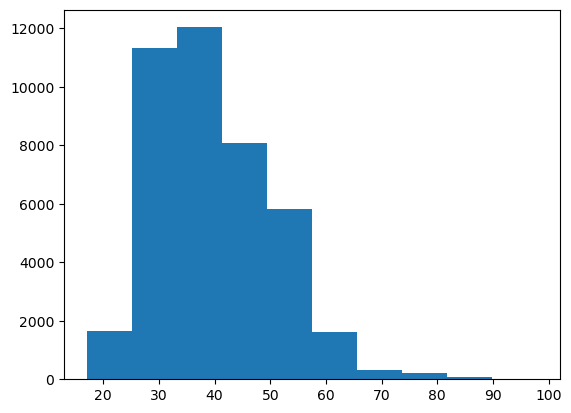

In [104]:
#age distribution
plt.hist(df['age'])

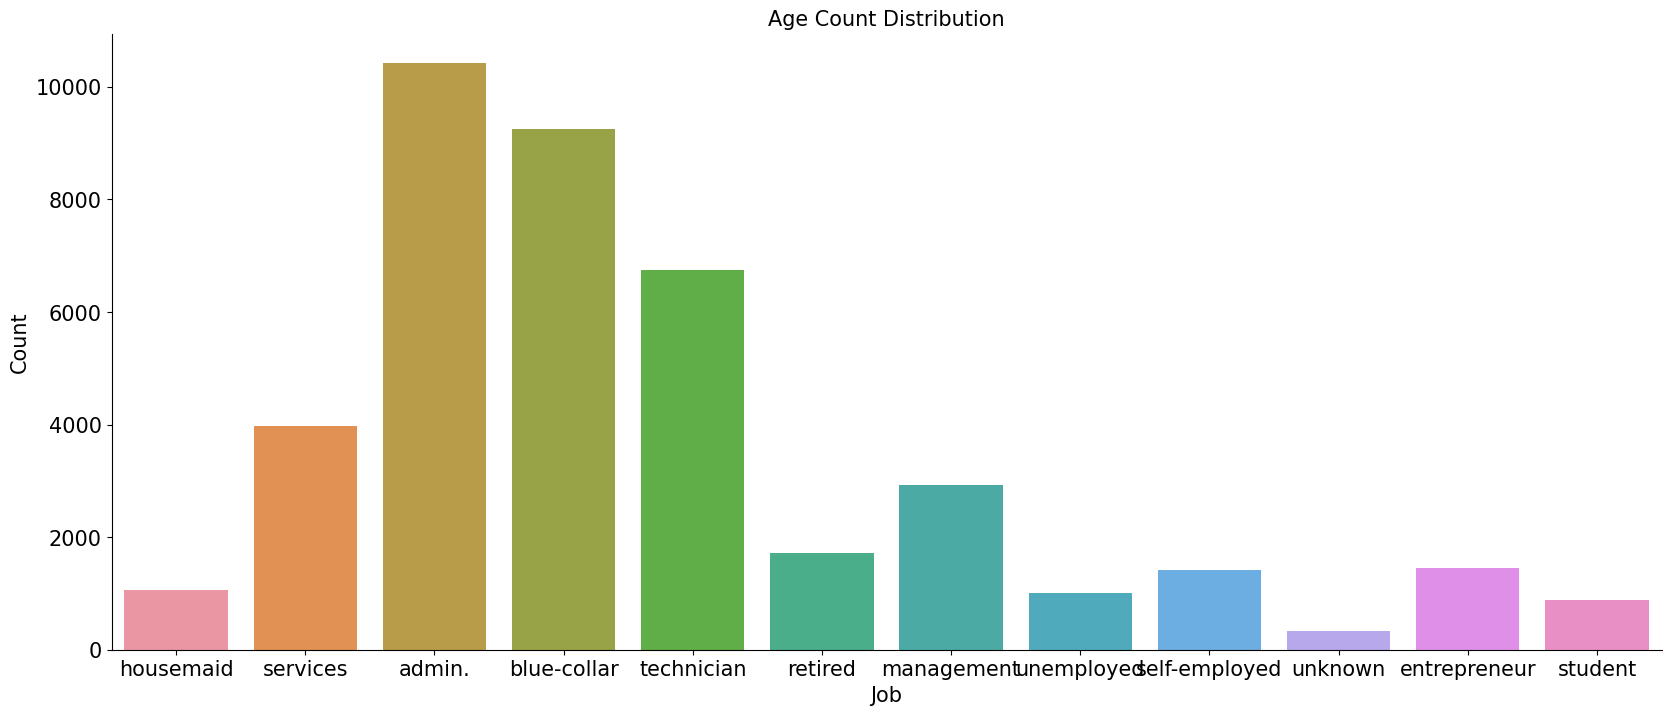

In [105]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

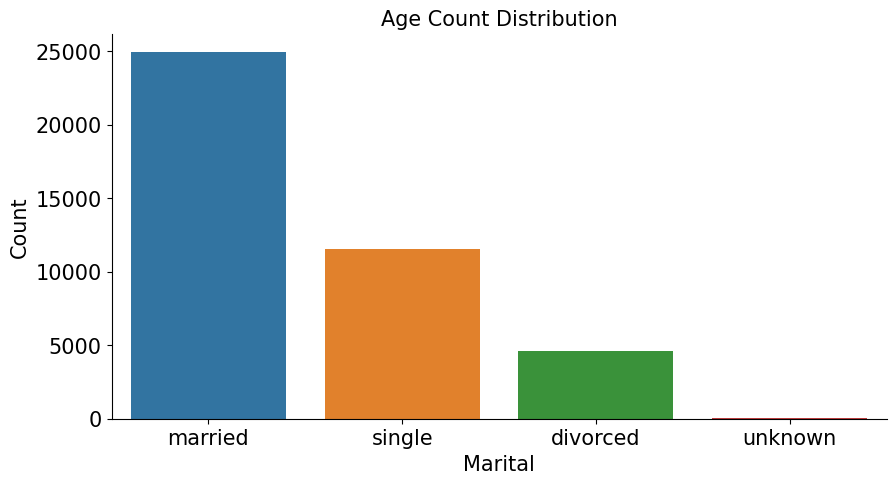

In [106]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = df)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

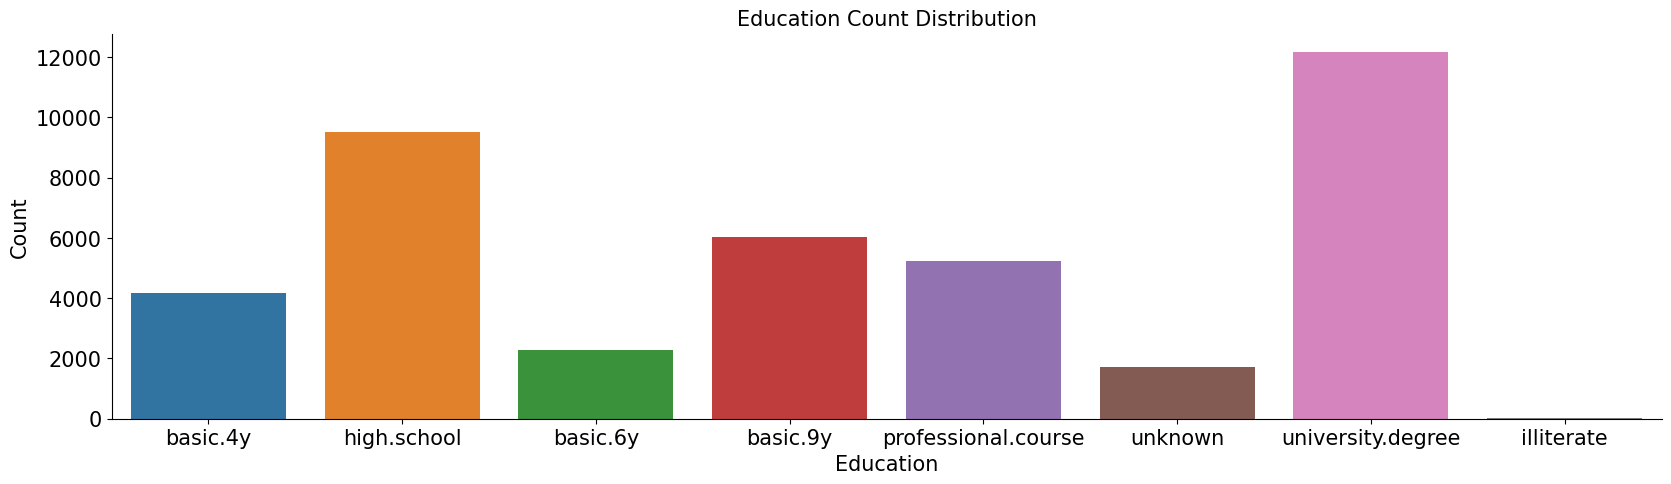

In [107]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = df)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

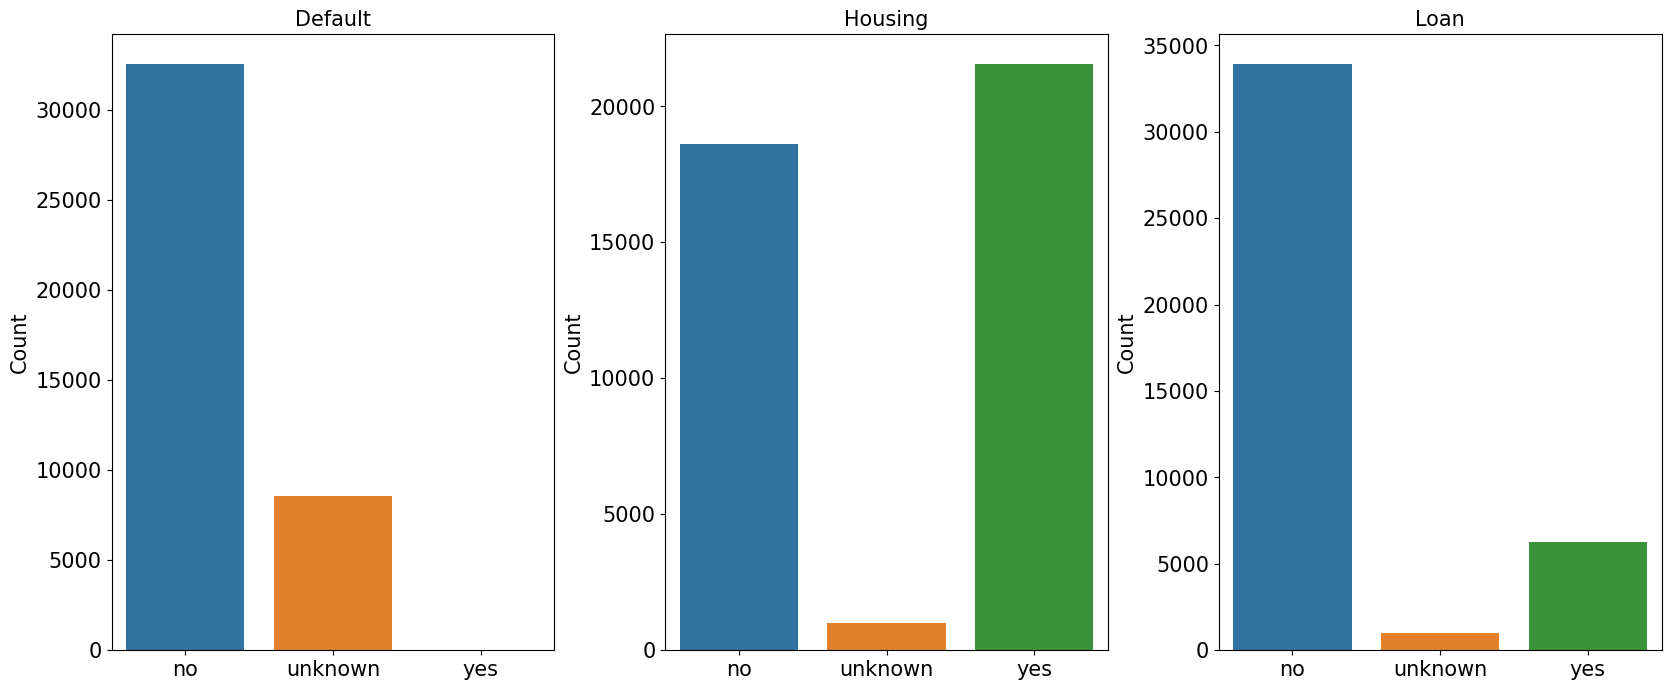

In [108]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = df, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = df, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [109]:
df['age'].nunique()

78

In [110]:
print('min age:',df['age'].min())

print('max age:',df['age'].max())

min age: 17
max age: 98


{'whiskers': [<matplotlib.lines.Line2D at 0x29438156f10>,
 'caps': [<matplotlib.lines.Line2D at 0x2943817bd10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2943813de10>],
 'medians': [<matplotlib.lines.Line2D at 0x294381853d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29438185e10>],
 'means': []}

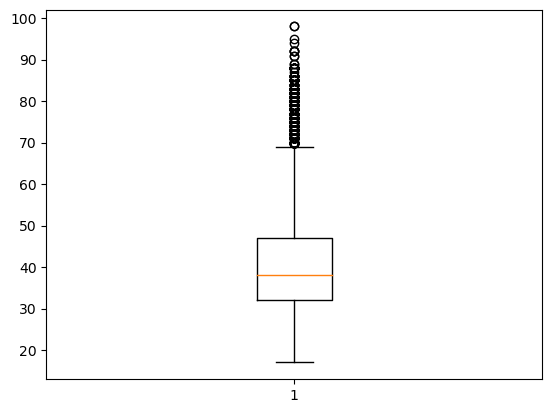

In [111]:
plt.boxplot(df['age'])

We have 78 different types of ages.So we group these ages into categories.

In [112]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(df);

In [113]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [114]:
df = pd.get_dummies(data = df, columns = ['job'] , prefix = ['job'] , drop_first = True)

df = pd.get_dummies(data = df, columns = ['marital'] , prefix = ['marital'] , drop_first = True)

df = pd.get_dummies(data = df, columns = ['education'], prefix = ['education'], drop_first = True)

df = pd.get_dummies(data = df, columns = ['default'] , prefix = ['default'] , drop_first = True)

df = pd.get_dummies(data = df, columns = ['housing'] , prefix = ['housing'] , drop_first = True)

df = pd.get_dummies(data = df, columns = ['loan'] , prefix = ['loan'] , drop_first = True)

df = pd.get_dummies(data = df, columns = ['contact'] , prefix = ['contact'] , drop_first = True)

df = pd.get_dummies(data = df, columns = ['poutcome'] , prefix = ['poutcome'] , drop_first = True)

In [115]:
df.head()

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,3,may,mon,261,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,False,False,False,True,True,False
1,3,may,mon,149,1,999,0,1.1,93.994,-36.4,...,False,True,False,False,False,False,False,True,True,False
2,2,may,mon,226,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,True,False,False,True,True,False
3,2,may,mon,151,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,False,False,False,True,True,False
4,3,may,mon,307,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,False,False,True,True,True,False


In [116]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [117]:
df['y'] = df['y'].replace({'yes': 1, 'no': 0})

In [118]:
df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [119]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,1.978610,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,0.735758,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,1.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,1.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,2.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,2.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [120]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['month']       = labelencoder.fit_transform(df['month']) 
df['day_of_week'] = labelencoder.fit_transform(df['day_of_week'])

In [121]:
df['day_of_week'].unique()

array([1, 3, 4, 2, 0])

In [122]:
df['duration'].nunique()

1544

In [123]:
df['duration'].max()

4918

{'whiskers': [<matplotlib.lines.Line2D at 0x294381fb950>,
 'caps': [<matplotlib.lines.Line2D at 0x294381efc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x294341c8110>],
 'medians': [<matplotlib.lines.Line2D at 0x29438209cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2943820a510>],
 'means': []}

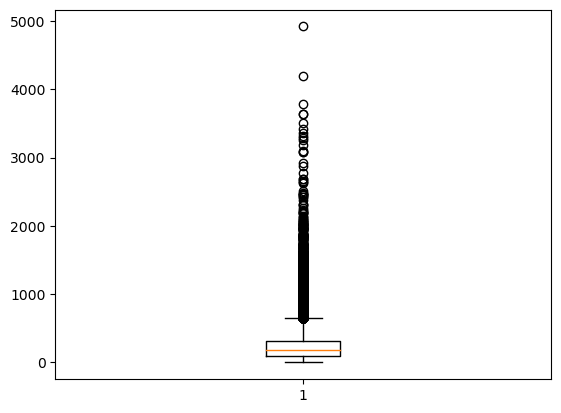

In [124]:
plt.boxplot(df['duration'])

In [125]:
df.shape

(41188, 43)

In [126]:
# Calculate the first and third quartiles
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with duration values outside the bounds
df = df[(df['duration'] >= lower_bound) & (df['duration'] <= upper_bound)]

# Now df_filtered contains the DataFrame with outliers removed from the 'duration' column


In [127]:
df.shape

(38225, 43)

In [128]:
print(df['duration'].nunique())
print(df['duration'].min())
print(df['duration'].max())

645
0
644


In [129]:
# Grouping duration column
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644), 'duration'] = 4
    data.loc[data['duration']  > 644, 'duration'] = 5

    return data
duration(df);

In [130]:
print(df['duration'].nunique())
print(df['duration'].min())
print(df['duration'].max())

4
1
4


In [131]:
# if the call duration is iqual to 0, then is obviously that this person didn't subscribed, 
df[(df['duration'] == 0)]

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success


In [132]:
df.head()

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,3,6,1,3,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,False,False,False,True,True,False
1,3,6,1,2,1,999,0,1.1,93.994,-36.4,...,False,True,False,False,False,False,False,True,True,False
2,2,6,1,3,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,True,False,False,True,True,False
3,2,6,1,2,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,False,False,False,True,True,False
4,3,6,1,3,1,999,0,1.1,93.994,-36.4,...,False,False,False,False,False,False,True,True,True,False


In [133]:
y = pd.DataFrame(df.pop('y'))

In [134]:
y.shape

(38225, 1)

In [135]:
df.shape

(38225, 42)

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.20, random_state = 42)

In [144]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =250, criterion ='gini', class_weight ='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\PAVI\anaconda3\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [145]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9325049051667756
Precision: 0.6255707762557078
Recall: 0.43769968051118213
F1 Score: 0.5150375939849624
ROC AUC Score: 0.7071672643900832
Confusion Matrix:
 [[6855  164]
 [ 352  274]]
